In [1]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [4]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('BayesianRidge_Pre/Input_A3_016.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [6]:
title = ['Input_A3_019','Input_A2_019','Input_A6_016','Input_A1_016','Input_A4_018']

# title = ['Input_A3_019','Input_A2_019','Input_A6_016','Input_A1_016','Input_A4_018',
#          'Input_A4_016','Input_A5_016','Input_A6_017','Input_A5_017','Input_A5_019']

In [7]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

In [8]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [9]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [10]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [12]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [13]:
y_pred = lasso.predict(X_test)

In [14]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.0558


In [15]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 87.92


In [16]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 12


In [17]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.013862


In [18]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      60.882612
std       63.736907
min        0.582071
10%        3.725280
20%       24.257850
30%       24.257850
40%       38.463317
50%       39.406280
60%       44.412080
70%       46.769487
80%       49.126894
90%      188.824161
max      198.253788
Name: Predict, dtype: float64

In [19]:
lasso.coef_

array([0.04714814, 0.        , 0.        , 0.        , 0.        ])

# Linear regresssion

In [20]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [21]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000091


In [22]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.009535


In [23]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.5533


In [24]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 54.06


In [25]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, y_pred, 15))

Number lower than error: 48


In [26]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      32.238848
std       43.604198
min        0.240796
10%        3.925444
20%        8.530026
30%       11.400146
40%       14.157294
50%       15.772111
60%       19.334446
70%       27.344851
80%       41.436793
90%       83.233984
max      277.081392
Name: Predict, dtype: float64

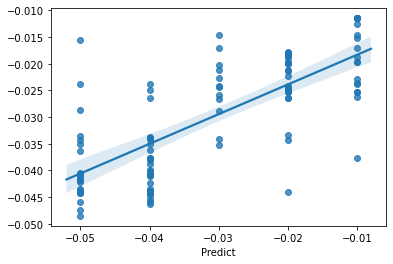

In [27]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [28]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(0.8046156026505571, 0.036091008855552026)

# XGBoost regression

In [29]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [30]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1785s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0932s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Batch computation too fast (0.0978s.) Setting batch_size=32.
[Parallel(n_jobs=6)]: Done  66 tasks      | elapsed:    3.8s


best params
{'booster': 'gbtree', 'n_estimators': 60}
best score
0.5507218571419111


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    6.2s finished


# 調 max_depth / min_child_weight

In [31]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0261s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.3s


best params
{'max_depth': 2, 'min_child_weight': 1}
best score
0.5717880287349568


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.7s finished


# 調 gamma

In [32]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0278s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s


best params
{'gamma': 0}
best score
0.5717880287349568


[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.1s finished


# 調 subsample / colsample_bytree

In [33]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0288s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  24 tasks      | elapsed:    0.2s


best params
{'colsample_bytree': 0.8, 'subsample': 0.8}
best score
0.5717880287349568


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.7s finished


# reg_alpha / reg_lambda

In [34]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.8}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0353s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1983s.) Setting batch_size=20.
[Parallel(n_jobs=6)]: Done  76 out of 126 | elapsed:    0.3s remaining:    0.2s


best params
{'reg_alpha': 0, 'reg_lambda': 0.05}
best score
0.5787708840662619


[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.4s finished


# learning_rate

In [35]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'gbtree', 'n_estimators':60, 'max_depth': 2, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.8,'reg_alpha': 0, 'reg_lambda': 0.05}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best params
{'learning_rate': 0.1}
best score
0.5787708840662619


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0229s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [37]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'gbtree', 
              n_estimators = 60, 
              max_depth = 2, 
              min_child_weight = 1,
              seed = 42,
              gamma = 0,
              subsample = 0.8,
              colsample_bytree = 0.8,
              reg_alpha =  0,
              reg_lambda = 0.05)

best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0.05, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred = best_xgb_model.predict(X_test)

In [39]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,y_pred))

R2 score: 0.5104


In [40]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: 51.00


In [41]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 46


In [42]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.009982


In [43]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      32.528618
std       39.466294
min        0.055230
10%        2.281479
20%        7.854605
30%       10.654563
40%       13.667049
50%       17.207021
60%       26.858693
70%       38.377480
80%       46.017628
90%       83.548540
max      281.286740
Name: Predict, dtype: float64

In [44]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,y_train))

XGBoost regression score: 0.6978


# DecisionTree

In [45]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [46]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1180s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0682s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1205s.) Setting batch_size=32.


best params
{'max_depth': 4, 'min_samples_split': 2}
best score
0.5145883034031027


[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.4s finished


In [47]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 2,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0170s.) Setting batch_size=22.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_leaf_nodes': 6, 'min_samples_leaf': 9}
best score
0.5224768999959594


[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.2s finished


In [48]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 2,
            max_leaf_nodes = 6,
            min_samples_leaf = 9,
            random_state = 42
)
# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [49]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.65439807 0.04368016 0.03649809 0.23689384 0.02852984]


In [50]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.4324


In [51]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: 60.65


In [52]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.010748


In [53]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      36.825691
std       48.425761
min        0.431034
10%        0.431034
20%        5.031569
30%        8.098592
40%       10.288462
50%       13.521127
60%       33.620690
70%       38.500000
80%       65.384615
90%       99.137931
max      341.666667
Name: Predict, dtype: float64

#  RandomForest

In [54]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [55]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0422s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done  76 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 148 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 220 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 308 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 396 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 604 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 724 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 844 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 980 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 1116 tasks      | elaps

best params
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 40}
best score
0.5930921519903148


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   18.0s finished


In [56]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 40,
            max_depth = 3,
            min_samples_split = 2,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0556s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 114 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 234 tasks      | elapsed:    2.4s


best params
{'max_leaf_nodes': 7, 'min_samples_leaf': 2}
best score
0.5967308613001819


[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    3.5s finished


In [57]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators = 40,
            max_depth = 3,
            min_samples_split = 2,
            max_leaf_nodes = 7,
            min_samples_leaf = 2,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [58]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.49539461 0.13160558 0.12659329 0.17913199 0.06727453]


In [59]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.5230


In [60]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: 54.40


In [61]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.009853


In [62]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      34.330118
std       42.398276
min        0.192785
10%        2.373582
20%        5.370946
30%        7.348707
40%       10.020439
50%       15.049982
60%       24.013405
70%       34.935210
80%       79.079786
90%       90.055019
max      248.886675
Name: Predict, dtype: float64

In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 